## Introduction

**Requirement 1: Describe your dataset. Describe and explore your dataset in the initial section of your Report. What does your data contain and what is its background? Where does it come from? Why is it interesting or significant? Conduct summary statistics and produce visualizations for the particular variables from the dataset that you will use.**

We will be working with the United Nations' World Marriage Data for all countries and areas of the world. The dataset itself consists of three different tables: Currently Married Men and Women, Ever-Married Men and Women, and Marital Status of Men and Women. For our purposes, we are going to focus on the Currently Married Men and Women table. e Currently Married Men and Women table details the percentage of currently married men and women by age group. The table contains marital information on 221 countries and is presented for the closest date available around five reference dates: the years closest to 1970, 1985, 1995, 2005 and the most recent data available. The data was collected through the United Nations Statistics Division(UNSD),United States Department of Homeland Security(DHS),Eurostat,Gulf Family Health Survey(GFHS),Multiple Indicator Cluster Survey(MICS),National statistics, PAPCHILD, PAPFAM, Reproductive Health Survey(RHS),and US Census Bureau with UNSD being the most frequently cited source of 69%. This data is interesting because it enables us to examine the changing patterns of marriage across the world and perform a comparative analysis of a country's marriage trends against the rest of the world. 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

married = pd.read_excel("Currently married men and women.xls", skiprows=3)

marriedfil= pd.read_excel("Currently married men and women.xls", skiprows=3, 
usecols= ["Country", "Year", "Sex", "15-19", "20-24", "25-29","30-34", "35-39","40-44", "45-49", "50-54","55-59","60-64","65+"])




**Summary Statistics (1) indicates the number of unique countries the table has information on the currently married men and women population by age group:**

In [3]:
married['Country'].nunique()

221

**Summary Statistics (2) indicates the frequency of the data source used for the table:** 

In [4]:
# Process Data to Create Counts by Source
SourceMarried = {}
for i in married['Source']:
    if i not in SourceMarried:
        SourceMarried[i] = 1
    else:
        SourceMarried[i] += 1

df=pd.DataFrame(data = SourceMarried.values(), index = SourceMarried.keys(), columns = ['# of Data Source Used in the Table'])
print(df)

                     # of Data Source Used in the Table
National statistics                                 207
UNSD                                               1218
DHS                                                 188
US Census Bureau                                     78
RHS                                                   8
PAPCHILD                                              5
PAPFAM                                                8
MICS                                                  2
GFHS                                                  8
EuroStat                                              2


In [5]:
#Display Percentage Values on a Pie Chart If Greater than 10%:
def my_autopct(pct):
    if pct > 10:
        return ('%1.0f%%' % pct)  
    else:
        ''

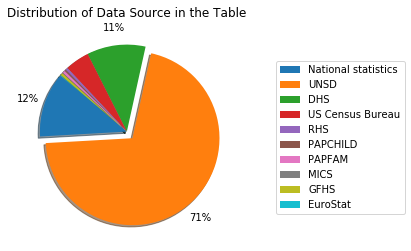

In [6]:
# Generate Pie Chart
explode = (0,0.1,0,0,0,0,0,0,0,0)
labels = list(SourceMarried.keys()) 
sizes = list(SourceMarried.values()) 

plt.pie(sizes,shadow=True, startangle=140, autopct= my_autopct, pctdistance=1.2, labeldistance=1, explode = explode)


plt.title("Distribution of Data Source in the Table")
plt.legend(labels, loc = 'lower right', bbox_to_anchor=(1.8, 0.1)) 


plt.show()

**Requirement 2: Ask and answer analytic questions. Ask three analytic questions and answer each one with a combination of statistics and visualizations. These analytic questions can focus on individuals behaviors or comparisons of the population.**

In this capstone project, we are going to study whether China's 2010 married population followed similar patterns of the average married population for the countries (including China) that were surveyed in 2010 by age and gender. To do this, we will need to answer the following three questions: 

(1) What was the overall landscape of male and female married population in China by age range across years?
(2) What was the landscape of male and female married population for the countries (including China) that were surveyed in 2010? 
(3) How did China's married population percentage by age in 2010 compare with its historical average and the avg of 37 countries? 

**Question 1: What was the overall landscape of male and female married population in China by age range across years?**

In [18]:
#Filter data bsed on country. Reorder data with years in rows and gender in columns. 
ChinaHist = marriedfil[marriedfil["Country"]== "China"].pivot(index = 'Year', columns = "Sex", values = ["15-19", "20-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-64", "65+"])
MeanChinaHist = round(ChinaHist.mean())
MeanChinaHist = MeanChinaHist.astype(int)
print(MeanChinaHist)
print(ChinaHist)

       Sex  
15-19  Men       1
       Women     3
20-24  Men      26
       Women    47
25-29  Men      74
       Women    89
30-34  Men      89
       Women    97
35-39  Men      92
       Women    97
40-44  Men      92
       Women    97
45-49  Men      92
       Women    95
50-54  Men      90
       Women    89
55-59  Men      89
       Women    86
60-64  Men      79
       Women    63
65+    Men      74
       Women    51
dtype: int64
     15-19       20-24       25-29       30-34       35-39        ... 45-49  \
Sex    Men Women   Men Women   Men Women   Men Women   Men Women  ...   Men   
Year                                                              ...         
1982   0.9   4.3  27.8  53.3  75.7  94.3  89.7  98.6  90.8  98.2  ...  89.8   
1990   1.8   4.6  37.3  58.4  82.4  95.0  91.4  98.4  92.3  98.4  ...  90.6   
2000   0.3   1.2  21.1  42.2  74.3  90.4  90.7  97.2  93.4  97.4  ...  92.7   
2010   0.6   2.1  17.4  32.2  62.6  77.4  85.1  92.6  90.7  95.4  ...  93.1   

  

       Sex  
15-19  Men       1
       Women     3
20-24  Men      26
       Women    47
25-29  Men      74
       Women    89
30-34  Men      89
       Women    97
35-39  Men      92
       Women    97
40-44  Men      92
       Women    97
45-49  Men      92
       Women    95
50-54  Men      90
       Women    89
55-59  Men      89
       Women    86
60-64  Men      79
       Women    63
65+    Men      74
       Women    51
dtype: int64


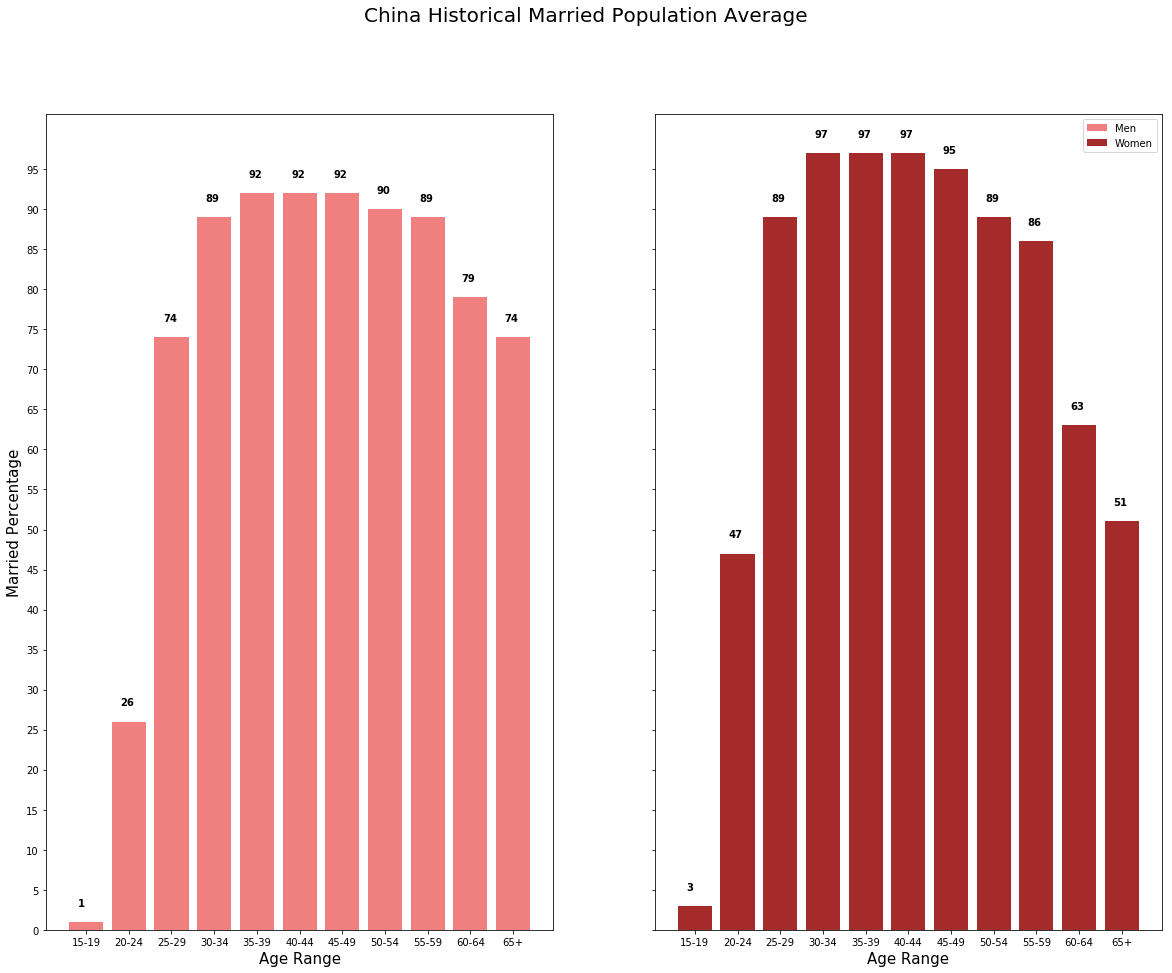

In [15]:
# Generate a two subplots in one figure
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,15), sharey=True)
ChinaHisM= ax1.bar(MeanChinaHist[:,"Men",:].index, MeanChinaHist[:,"Men",:].values, Label = 'Men', color = 'lightcoral') 
ChinaHisW = ax2.bar(MeanChinaHist[:,"Women",:].index, MeanChinaHist[:,"Women",:].values, Label = 'Women', color = 'brown')

print(MeanChinaHist)
plt.legend((ChinaHisM[0],ChinaHisW[0]), ('Men', 'Women'))

f.suptitle('China Historical Married Population Average', fontsize=20)
ax1.set_xlabel('Age Range', fontsize=15)
ax1.set_ylabel('Married Percentage', fontsize=15)
ax2.set_xlabel('Age Range', fontsize=15)

plt.yticks(np.arange(0, 100, 5)) 

# Display the value in each bar
for i, v in enumerate(MeanChinaHist[:,"Men",:].values):
    ax1.text(i-0.2, v + 2,str(v), color='black', fontweight='bold')
    
for i, v in enumerate(MeanChinaHist[:,"Women",:].values):
    ax2.text(i-0.2, v + 2,str(v), color='black', fontweight='bold')

plt.show()


The plot shows us one thing (other than the average percentage of historical married population by age group in China): the percentage of married populations for both Chinese men and women peaked above 90% around the late 30s and early 40s but experienced a decline all the way into 60s after the age of 50. Notably, the percent married for Chinese women after 65 dropped to 51%, which indicated a high divorce rate or a high rate of widowhood. 

**Question 2: What was the landscape of male and female married population for the countries (including China) surveyed in 2010?**

In [9]:
#filter data based on year. Reorder data with gender in columns, and countries in rows. The values are values put into each row-column pair.
M2010= marriedfil[marriedfil["Year"]==2010].pivot(index="Country", columns= "Sex", values = ["15-19", "20-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-64", "65+"])

#number of countries that were surveyed in 2010
print(len(M2010.index)) 
print(M2010.index)

37
Index(['Afghanistan', 'Argentina', 'Armenia', 'Aruba', 'Bermuda', 'Brazil',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cayman Islands', 'China',
       'Colombia', 'Ecuador', 'Finland', 'Hungary', 'Iceland', 'Indonesia',
       'Italy', 'Japan', 'Liechtenstein', 'Malawi', 'Malaysia', 'Malta',
       'Mexico', 'Mongolia', 'Norway', 'Panama', 'Qatar', 'Russian Federation',
       'Rwanda', 'Senegal', 'Singapore', 'Slovakia', 'Sweden', 'Tajikistan',
       'United Republic of Tanzania', 'Zimbabwe'],
      dtype='object', name='Country')


In [48]:
#Round the mean of the values that are put into each age range for each gender.
Mean2010 = round(M2010.mean()) 

#Convert to a numpy array of integer values
Mean2010 = Mean2010.astype(int) #
print(Mean2010)

       Sex  
15-19  Men       2
       Women     9
20-24  Men      16
       Women    35
25-29  Men      45
       Women    57
30-34  Men      64
       Women    70
35-39  Men      75
       Women    74
40-44  Men      78
       Women    74
45-49  Men      80
       Women    72
50-54  Men      79
       Women    69
55-59  Men      81
       Women    67
60-64  Men      79
       Women    63
65+    Men      74
       Women    40
dtype: int64


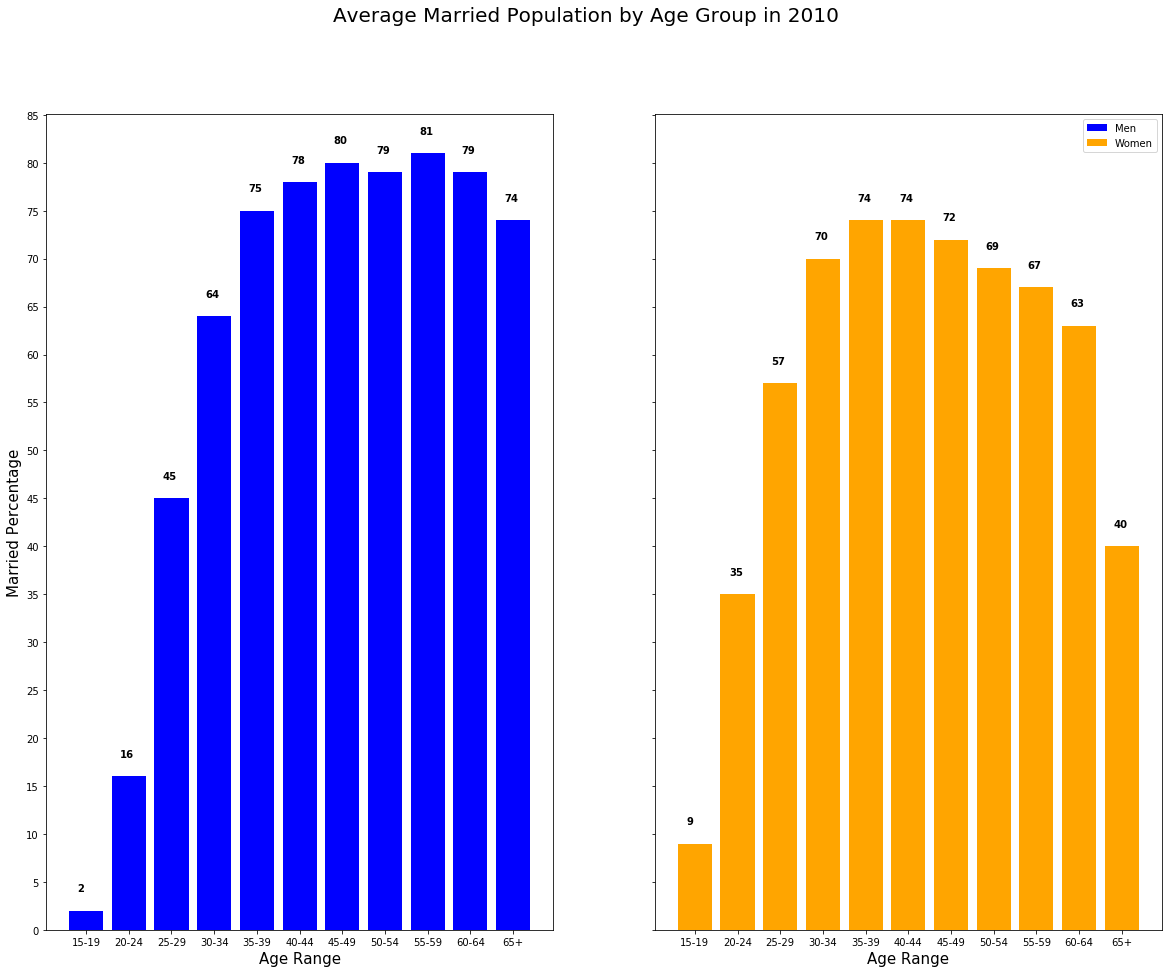

In [56]:
# Generate 2 subplots in the form of a bar table
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,15), sharey=True)
MB= ax1.bar(Mean2010[:,"Men",:].index, Mean2010[:,"Men",:].values, Label = 'Men', color = 'blue') 
WB = ax2.bar(Mean2010[:,"Women",:].index, Mean2010[:,"Women",:].values, Label = 'Women', color = 'orange')

plt. legend((MB[0],WB[0]), ('Men', 'Women'))

f.suptitle('Average Married Population by Age Group in 2010', fontsize=20)
ax1.set_xlabel('Age Range', fontsize=15)
ax1.set_ylabel('Married Percentage', fontsize=15)
ax2.set_xlabel('Age Range', fontsize=15)

plt. yticks(np.arange(0, 86, 5)) 

# Display the value in each bar
for i, v in enumerate(Mean2010[:,"Men",:].values):
    ax1.text(i-0.2, v + 2,str(v), color='black', fontweight='bold')
    
for i, v in enumerate(Mean2010[:,"Women",:].values):
    ax2.text(i-0.2, v + 2,str(v), color='black', fontweight='bold')

plt.show()

The plot shows us one thing (other than the average percentage of married population by age group and gender in 37 countries): men had a lower married percentage before the age of 35 but had a higher married percentage after 35 all the way going into the 60s than women in 2018. On average, women had the highest married percentage between 35-44 at around 74% while men had the highest married percentage between 55-59 at around 81%. Men' married percentage remained relatively stable going into the 60s while women's married percentage was fallen by nearly half from its peak.

**Question 3: How did China's married population percentage by age in 2010 compare with its historical average and the avg of 37 countries?**

In [66]:
#Filter data based on country and year. Reorder data with gender in rows and year in columns
ChinaM= marriedfil[(marriedfil['Country']== "China")&(marriedfil['Year']==2010)].pivot(index = "Sex", columns= "Year", values = ["15-19", "20-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-64", "65+"])

#round and convert to a numpy array of integer values
ChinaM = round(ChinaM).astype(int)
print(ChinaM)

      15-19 20-24 25-29 30-34 35-39 40-44 45-49 50-54 55-59 60-64  65+
Year   2010  2010  2010  2010  2010  2010  2010  2010  2010  2010 2010
Sex                                                                   
Men       1    17    63    85    91    92    93    92    91    88   75
Women     2    32    77    93    95    96    95    92    90    83   52


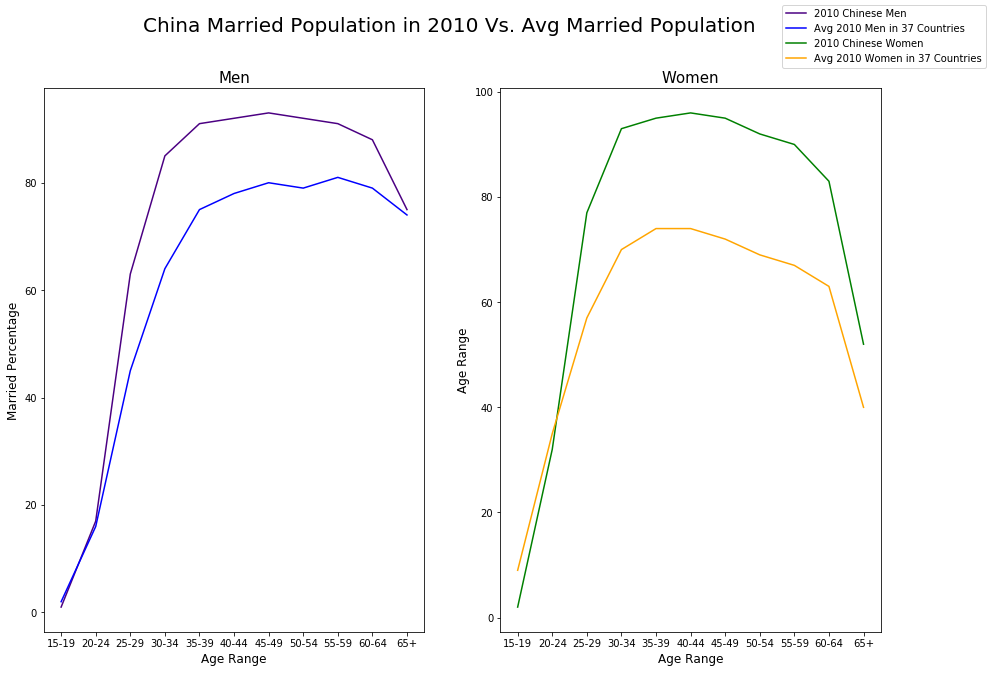

In [67]:
#Generate 2 subplots in a figure in the form of a line graph 
fig1, (ax3,ax4) = plt.subplots(nrows=1, ncols=2, figsize=(15,10))

x = Mean2010[:,"Men",:].index
y1 = ChinaM.values[0]
y2 = ChinaM.values[1] 
y3 = Mean2010[:,"Men",:].values
y4 = Mean2010[:,"Women",:].values

ax3.plot(x, y1, label='2010 Chinese Men', color = "indigo") 
ax3.plot(x,y3,label='Avg 2010 Men in 37 Countries', color = "Blue")
ax4.plot(x, y2, label='2010 Chinese Women', color = 'green')
ax4.plot(x,y4, label ='Avg 2010 Women in 37 Countries', color = 'Orange')


fig1.suptitle('China Married Population in 2010 Vs. Avg Married Population', fontsize=20)


ax3.set_xlabel('Age Range', fontsize=12)
ax3.set_ylabel('Married Percentage', fontsize=12)
ax4.set_xlabel('Age Range', fontsize=12)
ax4.set_ylabel('Age Range', fontsize=12)

ax3.set_title('Men',fontsize=15 )
ax4.set_title('Women', fontsize=15)


fig1.legend()
plt.show()

If we look at subplot Men in the figure, Chinese men's married percentage in 2018 followed a similar pattern of a rise and fall to that of the 35 countries' men in 2018 with respect to age. The only difference is that that Chinese men's married percentage in each age range was higher than that of the 35 countries' men in 2018. However, if we look at subplot Women in the first figure, although Chinese women's married percentage in 2018 also followed a similar pattern of a rise and fall to that of the 35 countries' men in 2018, it started out being lower than that of the 35 countries' women between 15-24 and became significantly higher than that of the 35 countries' at the age of 25 and on.

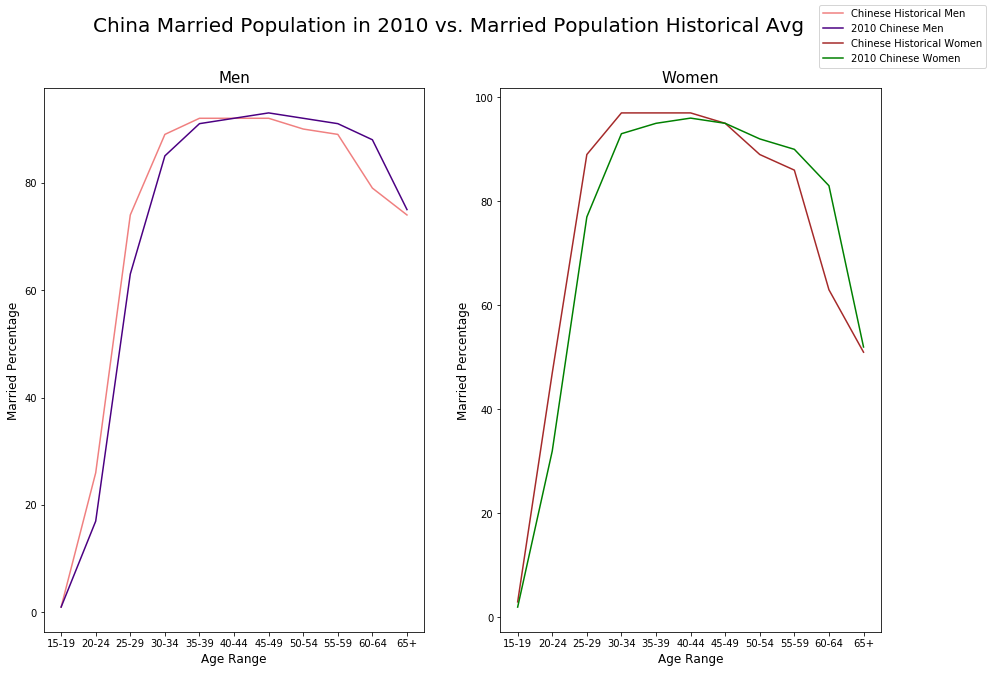

In [65]:
fig2, (ax5,ax6) = plt.subplots(nrows=1, ncols=2, figsize=(15,10))
y5 = MeanChinaHist.values[0:21:2] #men
y6 = MeanChinaHist.values[1:22:2] #women

ax5.plot(x,y5,label='Chinese Historical Men', color = 'lightcoral')
ax5.plot(x, y1, label='2010 Chinese Men', color = "indigo")
ax6.plot(x,y6, label = 'Chinese Historical Women', color = 'brown')
ax6.plot(x, y2, label='2010 Chinese Women', color = 'green')

fig2.suptitle('China Married Population in 2010 vs. Married Population Historical Avg', fontsize=20)

ax5.set_title('Men', fontsize=15)
ax6.set_title('Women', fontsize=15)

ax5.set_xlabel('Age Range', fontsize=12)
ax5.set_ylabel('Married Percentage', fontsize=12)
ax6.set_xlabel('Age Range', fontsize=12)
ax6.set_ylabel('Married Percentage', fontsize=12)

fig2.legend()
plt.show()

If we look at subplot Men in the second figure, Chinese men's married percentage in 2010 compared to its historical married percentage was lower up until the age of 40. Although both lines show a decline in married percentage going into their 60s, Chinese men's married percentage in 2010 had a slower decline with age than that of its historical average. If we look at subplot Women in the second figure, Chinese women's married percentage in 2010 was lower than its historical average up until the age of 45. Both lines show that the married population noticeably decreased after the age of 50. 

**Lastly, make a proposal for a realistic future research project on this dataset that would use some data science techniques you'd like to learn in the bootcamp. Just like your earlier questions, your research proposal should present one or more clear questions. Then you should describe the techniques you would apply in order to arrive at an answer.**

(1) For my future research, I would like to answer if there is a correlation between a country's economic development and distribution of married population by age. I would like to predict different factors that will influence the percentage of the married population. 